In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [6]:
from google.colab import files
d = files.upload()

Saving Customer+List.csv to Customer+List (1).csv


In [7]:
df = pd.read_csv('Customer+List.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  400 non-null    int64 
 1   Gender       400 non-null    object
 2   Age          400 non-null    int64 
 3   Salary       400 non-null    int64 
 4   Purchased    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.shape

(400, 5)

In [10]:
df.describe()

,Customer ID,Age,Salary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,37.655000,69742.500000,0.357500
std,115.614301,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,100.750000,29.750000,43000.000000,0.000000
50%,200.500000,37.000000,70000.000000,0.000000
75%,300.250000,46.000000,88000.000000,1.000000
max,400.000000,60.000000,150000.000000,1.000000


In [11]:
df

,Customer ID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0
...,...,...,...,...,...
395,396,Female,46,41000,1
396,397,Male,51,23000,1
397,398,Female,50,20000,1
398,399,Male,36,33000,0


In [12]:
df1 = df.drop(columns=['Customer ID'])

In [13]:
df1 = df1.drop(columns=['Gender'])

In [14]:
df1

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [15]:
x = df1.iloc[:,[0,1]].values

In [16]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [17]:
y = df1.iloc[:,-1].values

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1234)

In [21]:
x_train.shape

(320, 2)

In [22]:
x_test.shape

(80, 2)

In [23]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [24]:
model1 = GaussianNB()
model2 = BernoulliNB()
model3 = MultinomialNB()

In [25]:
model1.fit(x_train,y_train)

GaussianNB()

In [26]:
model2.fit(x_train,y_train)

BernoulliNB()

In [27]:
model3.fit(x_train,y_train)

MultinomialNB()

In [28]:
y_predict1 = model1.predict(x_test)
y_predict2 = model2.predict(x_test)
y_predict3 = model3.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm1 = confusion_matrix(y_test,y_predict1)
cm2 = confusion_matrix(y_test,y_predict2)
cm3 = confusion_matrix(y_test,y_predict3)

In [31]:
cm1

array([[48,  5],
       [ 7, 20]])

In [32]:
cm2

array([[53,  0],
       [27,  0]])

In [33]:
cm3

array([[42, 11],
       [20,  7]])

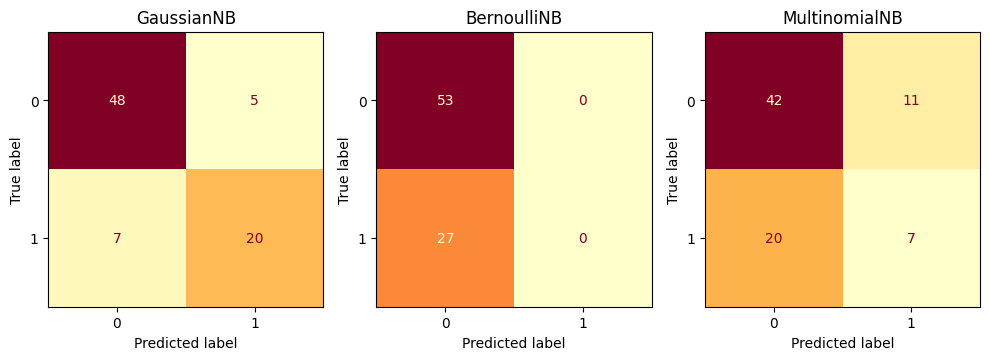

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
titles = ["GaussianNB", "BernoulliNB", "MultinomialNB"]
cms = [cm1, cm2, cm3]

for ax, cm, title in zip(axes, cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False, cmap='YlOrRd')
    ax.set_title(title)

plt.tight_layout()
plt.show()
